# 3.3 Example - Experiment Class - QEXAFS Data Processing - XAS Interpolation-Export for PCA MCR-ALS

## This notebook assumes that you have run either: 
    1. 3.0 Example - Experiment Class - QEXAFS Data Processing - Parameter determination using small data set
    2. 3.2 Example - QEXAFS Data Processing - Bulk Calibration, Normalization

### Goal of Workflow:

    1. Open existing experiment pickle
    2. Determine usable interpolation range
    3. Interpolate XAS Data
    
### Steps:
    1. Import Modules
    2. Define Paths
    3. Open Saved Experiment using 'pickle'
    4. Interpolate XAS Data
    5. Save Experiment with 'pickle'

### Things to have ready when attemtping this example:
    1. Directory and filename where the experiment object (pickle) is saved
    2. Parameter valuves from Example 3.0

## Step 1. Import Modules

In [1]:
# DO NOT MODIFY BELOW

# File Handling
import os
import pickle

# Make Plotting interactive
from ipywidgets import interact, fixed

# Wrapper for xraylarch (larch)
os.chdir('..')
pwd = os.getcwd()
os.chdir('./catxas')
import general as fcts
import xas as xfcts
import plot as pfcts
import process
import experiment as exp


# Plot Handling
%matplotlib inline

## Step 2. Define Paths

#### Modify:
    1. pickle_dir - directory where to save the experiment
    2. pickpe_name - filename of the saved experiment (must include extension '.pickle')

In [1]:
# Directory Containing Experiment:
pickle_dir = r'D:\UU QEXAFS Workup\Nina - BF31\QEXAFS Python Workup Testing 20220922'

# Name of Experiment (must include extension '.pickle')
pickle_name = 'BF31-Fe-All.pickle'

## Step 3. Open Saved Experiment using 'pickle'

    Pickle - A method to save the experimental class and reopen it elsewhere.

In [3]:
# DO NOT MODIFY BELOW

pickle_path = os.path.join(pickle_dir,pickle_name)
pickle_in = open(pickle_path,"rb")
my_exp = pickle.load(pickle_in)
pickle_in.close()

## Step 4. Interpoated XAS spectra (NORMALIZED XANES ONLY)

    It may be useful to export the spectra on a uniform grid with a specific energy range.  Common uses are for:
        1. plotting in non-python software
        2. taking a subset of the data for use in alternative analysis packages (UU PCA/MCR-ALS)

### Sub steps for saving interpolated spectra:
    a. Determine the largest possible energy range and step size - this looks for the largest startign erngy value, smallest ending energy, and average step size to to determine over/under sampling.
    b. Perform the interpolation based upon start/stop/step size.
    c. Save the data to a user specified .csv file and path
    
### 4a. Determinin largest interpolation range given XAS structure 

In [4]:
# DO NOT MODIFY BELOW
df = my_exp.check_Energy_Range(has_e0 = False, spectra_name = 'mu Sample', print_summary = True)

Energy Range and Energy-Step Summary for mu Sample
	Variation in starting energy points between spectra [eV]: 6959.53-6960.19
	Variation in ending energy points between spectra [eV]: 7870.39-7871.73
	Variation in step size of energy points between spectra [eV]: 0.05-0.05



### 4b. Perform the interpolation based upon start/stop/step size

interpolation writes a dataframe to the exepriemnt.summary dictionary.

#### Modify:
    1. Start - energy to start the interpolation at
    2. Stop - energy to stop interpolation
    3. Step - energy step to interpolate on

In [5]:
# Set the energy range and step size to interpolate onto
start = 7000 #eV
stop = 7800 #eV
step = 0.25 #eV

In [6]:
# Interpolate Spectra

spectra = 'mu Sample' # could also be 'mu Reference'
x_xais = 'energy' # 'k' is in development for EXAFS extraction later

# DO NOT MODIFY BELOW

my_exp.interpolate_spectra(start, stop, step, x_axis = 'energy', sample = 'mu Sample')

<AxesSubplot:xlabel='energy'>

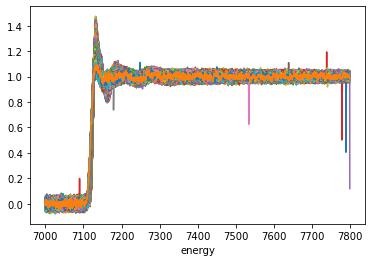

In [7]:
# Visualzie interpolated spectra with plot

my_exp.__dict__['summary']['Interpolated energy'].plot(legend=False)

## Step 5. Save Experiment with 'pickle' 
    Pickle - A method to save the experimental class and reopen it elsewhere.

In [ ]:
# DO NOT MODIFY BELOW

pickle_out = open(pickle_path,"wb")
pickle.dump(my_exp, pickle_out)
pickle_out.close()

# Do not forget to kill this kernal to prevent pileup on the RAM